# Bank Personal Loan_LogisticRegression

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

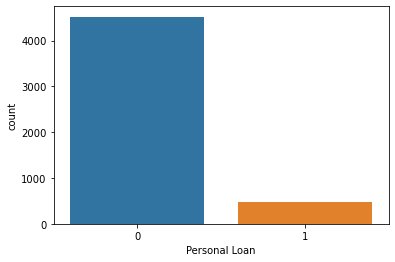

In [8]:
sns.countplot(data=df,x='Personal Loan')

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Analysis: Experience has -3 as minimum values which is invalid**

In [5]:
df['Experience'] = df['Experience'].abs()

In [11]:
df.corr().transpose()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008202,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.993991,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008202,0.993991,1.000000,-0.046876,-0.028936,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.017695,-0.055269,-0.046876,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028936,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.051851,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049738,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013919,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.011097,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.008304,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [12]:
df = df.drop(['ID','ZIP Code'], axis=1)

<AxesSubplot:>

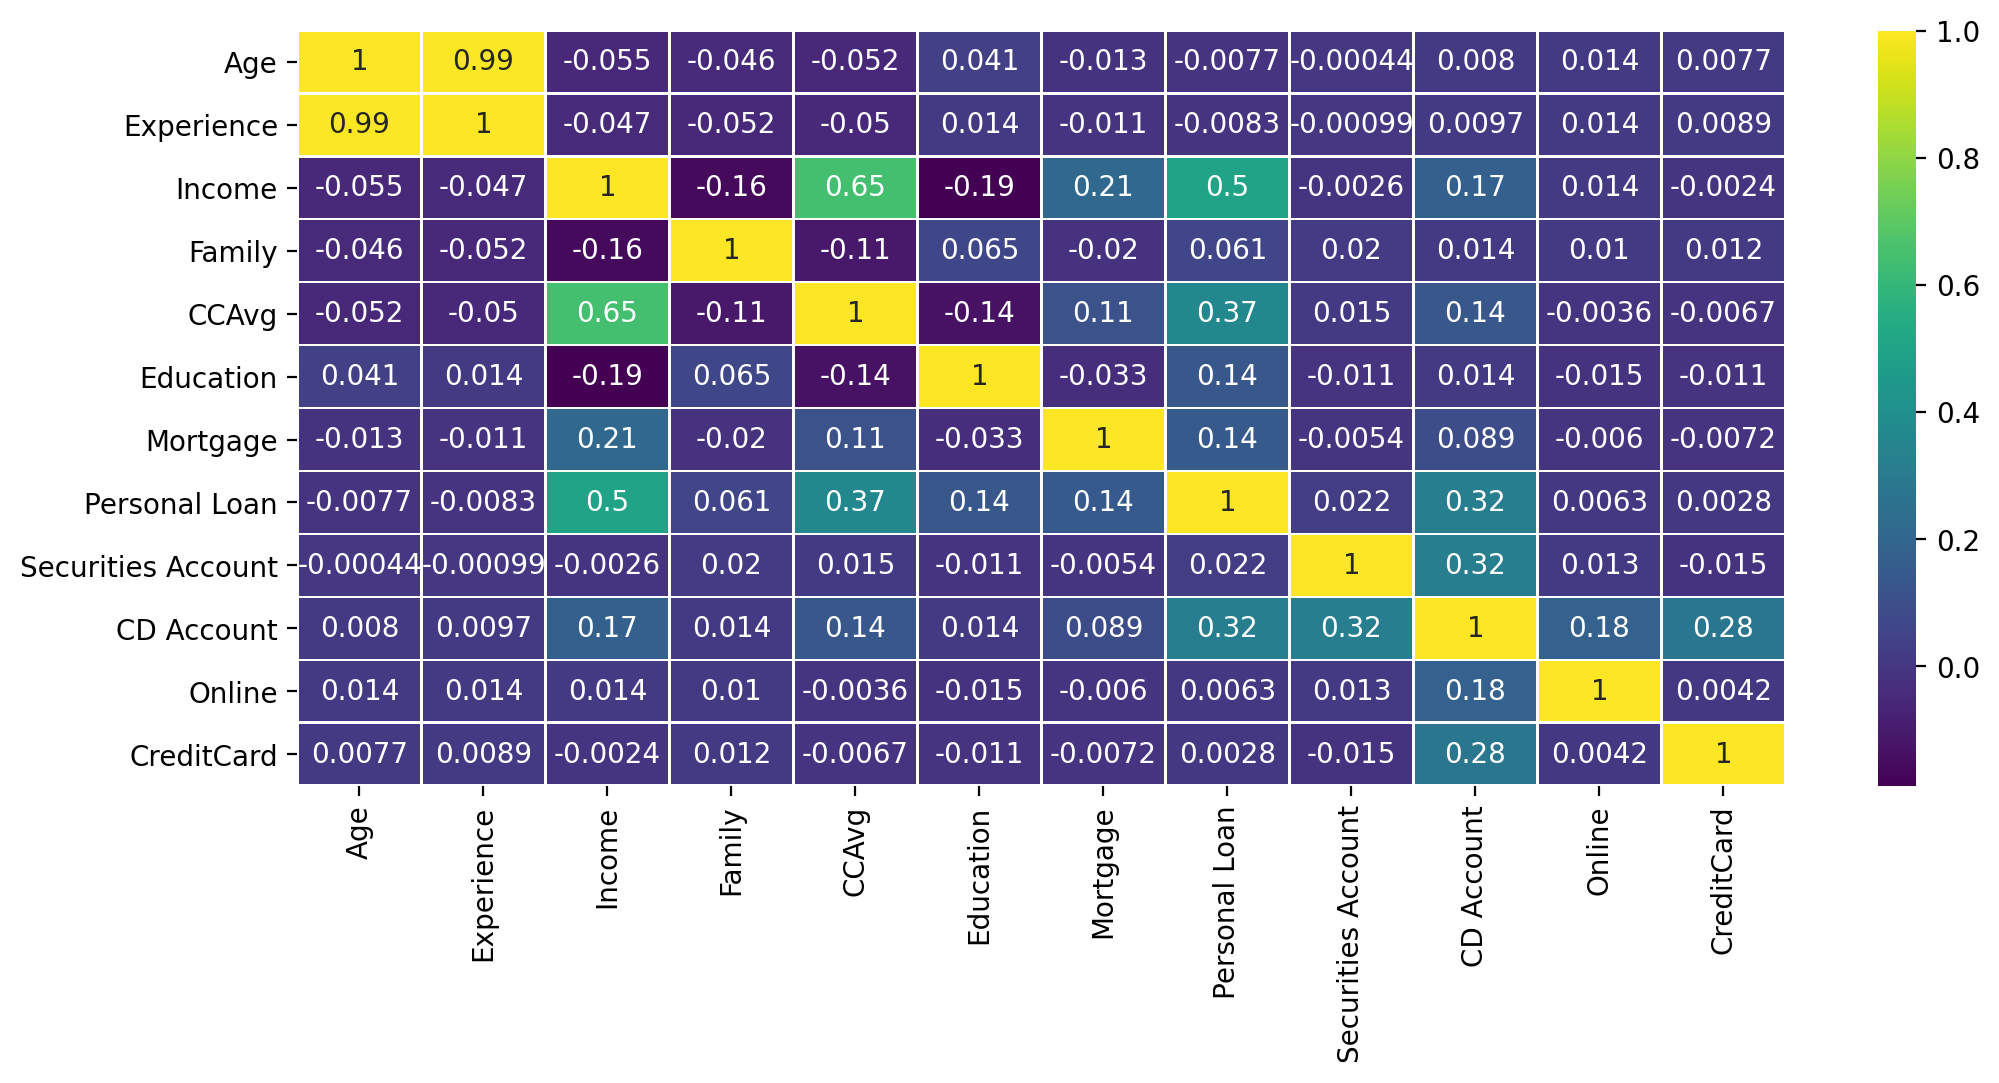

In [40]:
plt.figure(figsize=(12,5),dpi=200)
sns.heatmap(df.corr(),cmap='viridis',linewidth=0.5,annot=True)

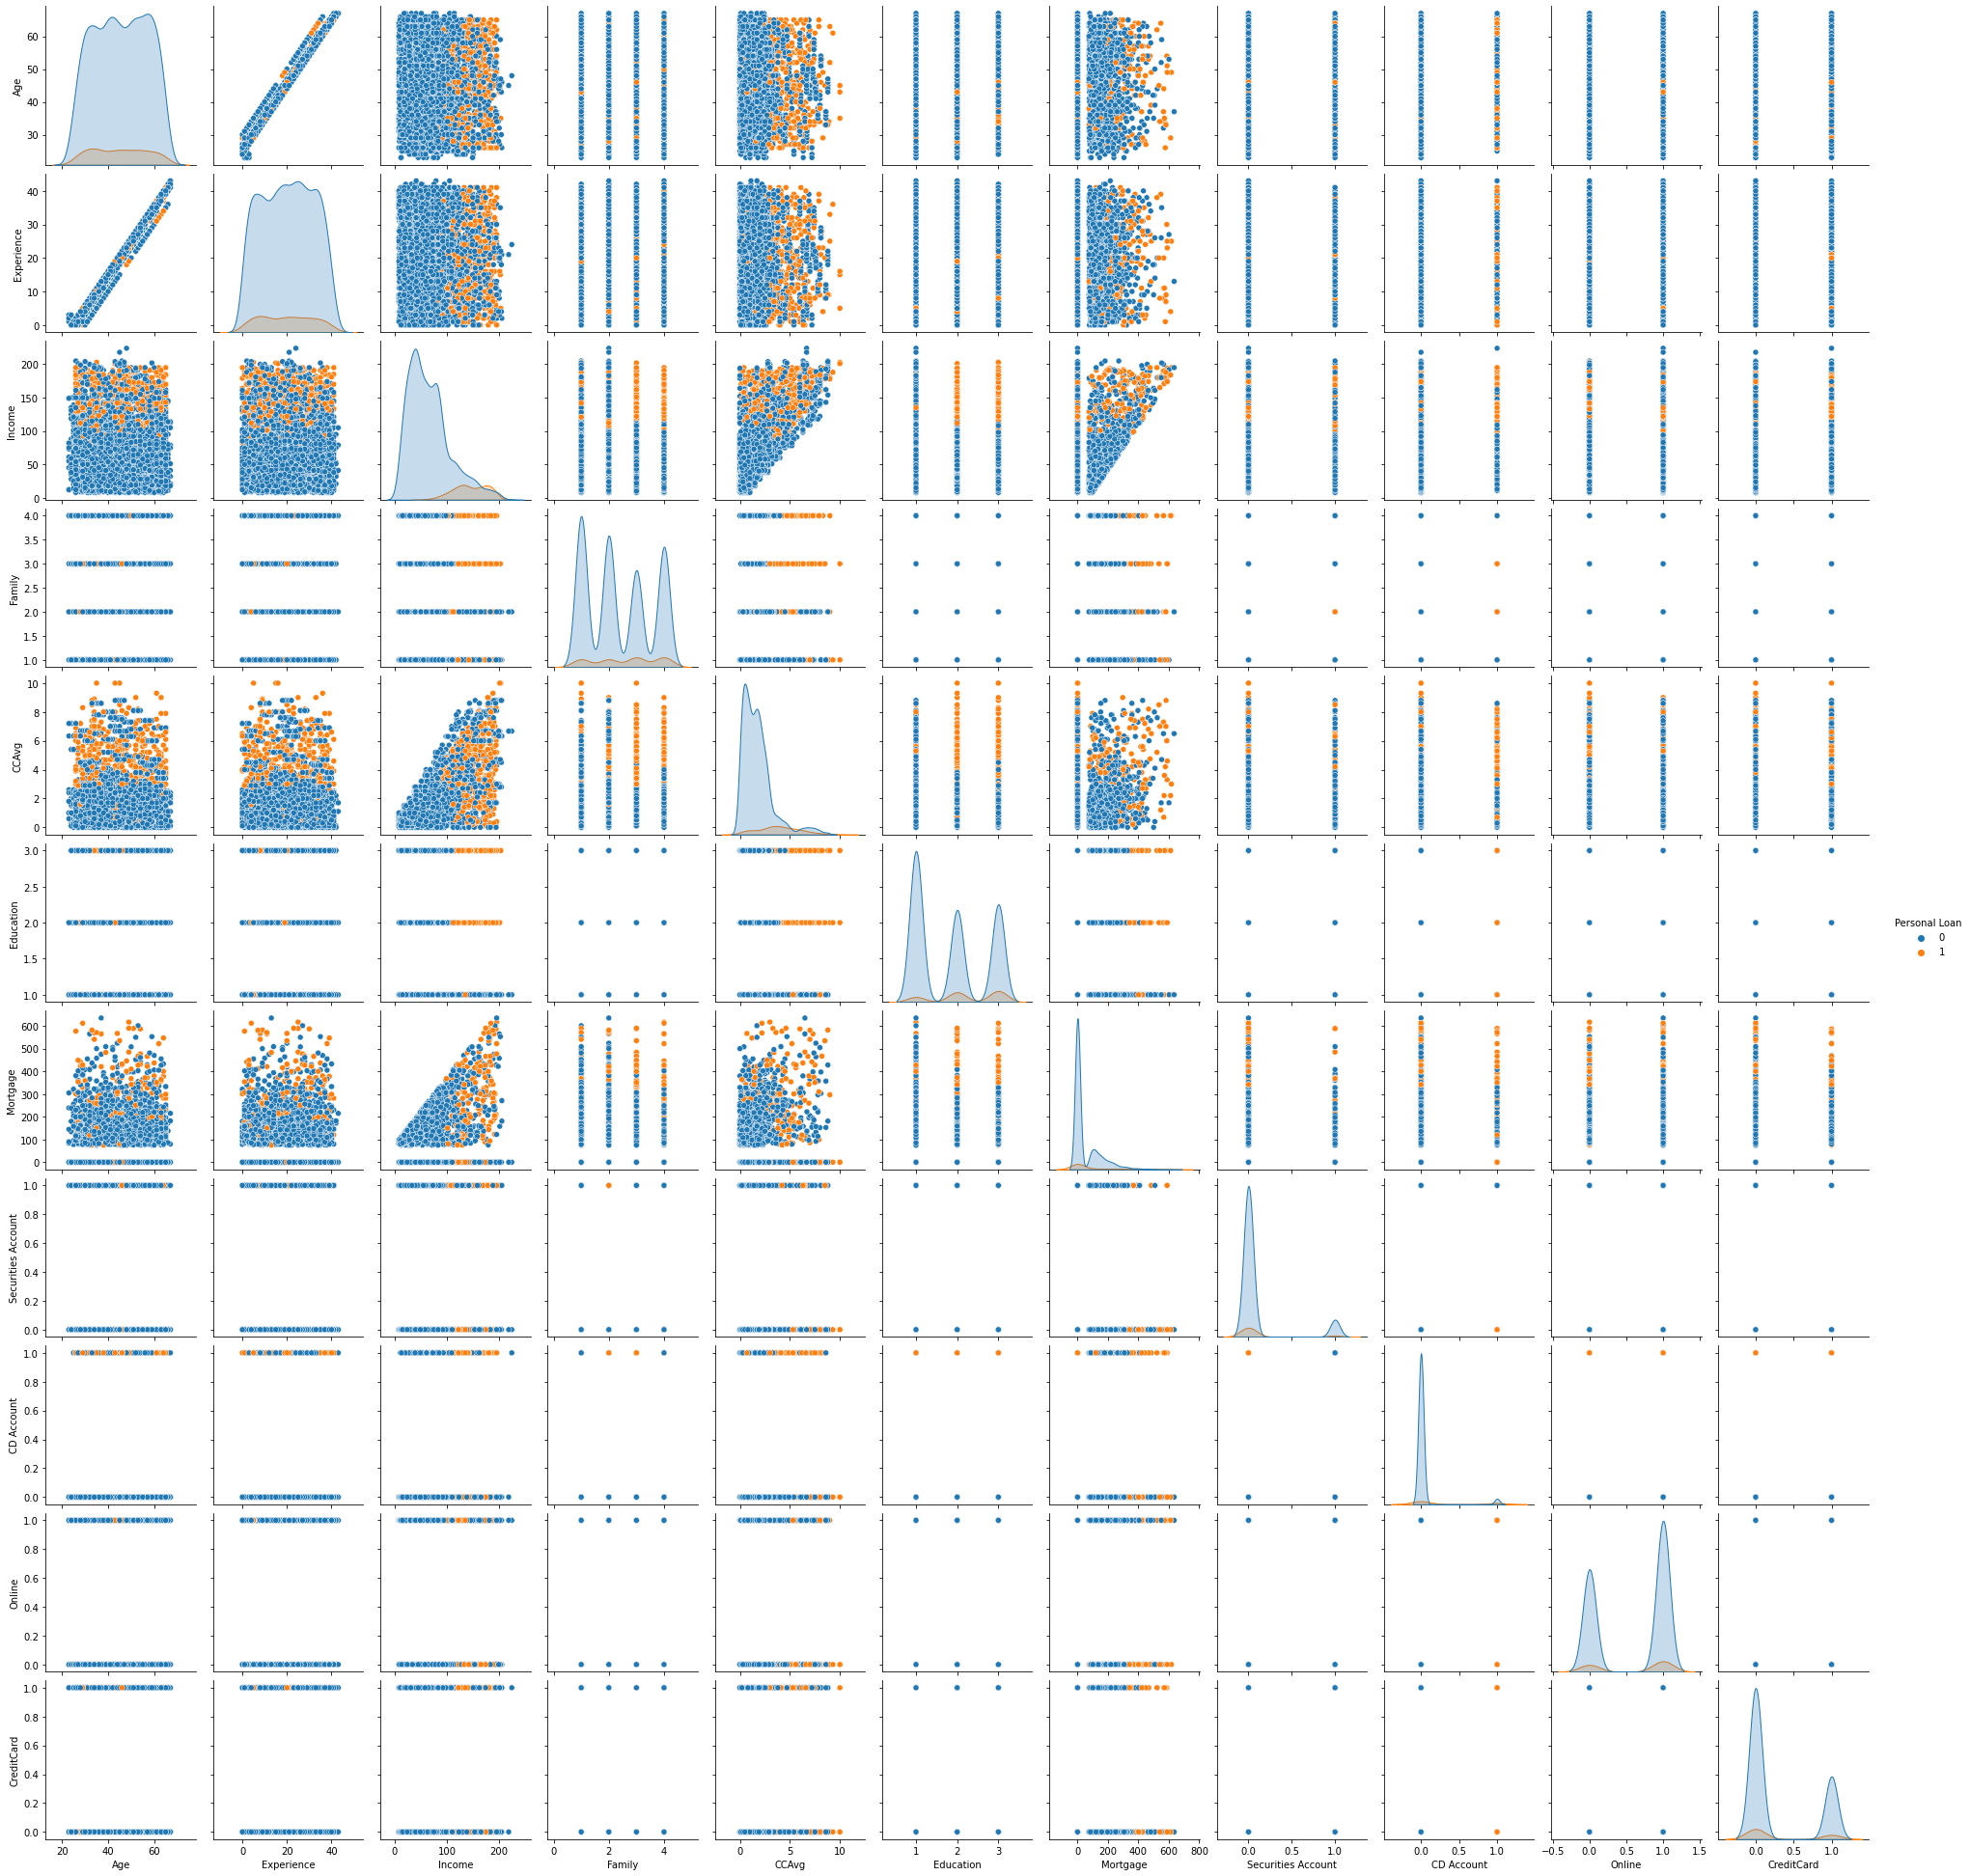

In [85]:
sns.pairplot(df, hue='Personal Loan')
#'Age','Experience','Income','Education','Mortgage','Securities Account','CD Account','CreditCard'

C:\Users\srilatha\anaconda3\envs\Udemy_Satish\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


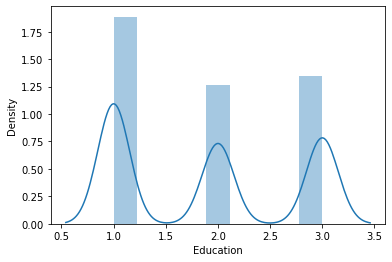

In [29]:
sns.distplot(df['Education']);

C:\Users\srilatha\anaconda3\envs\Udemy_Satish\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\srilatha\anaconda3\envs\Udemy_Satish\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\srilatha\anaconda3\envs\Udemy_Satish\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

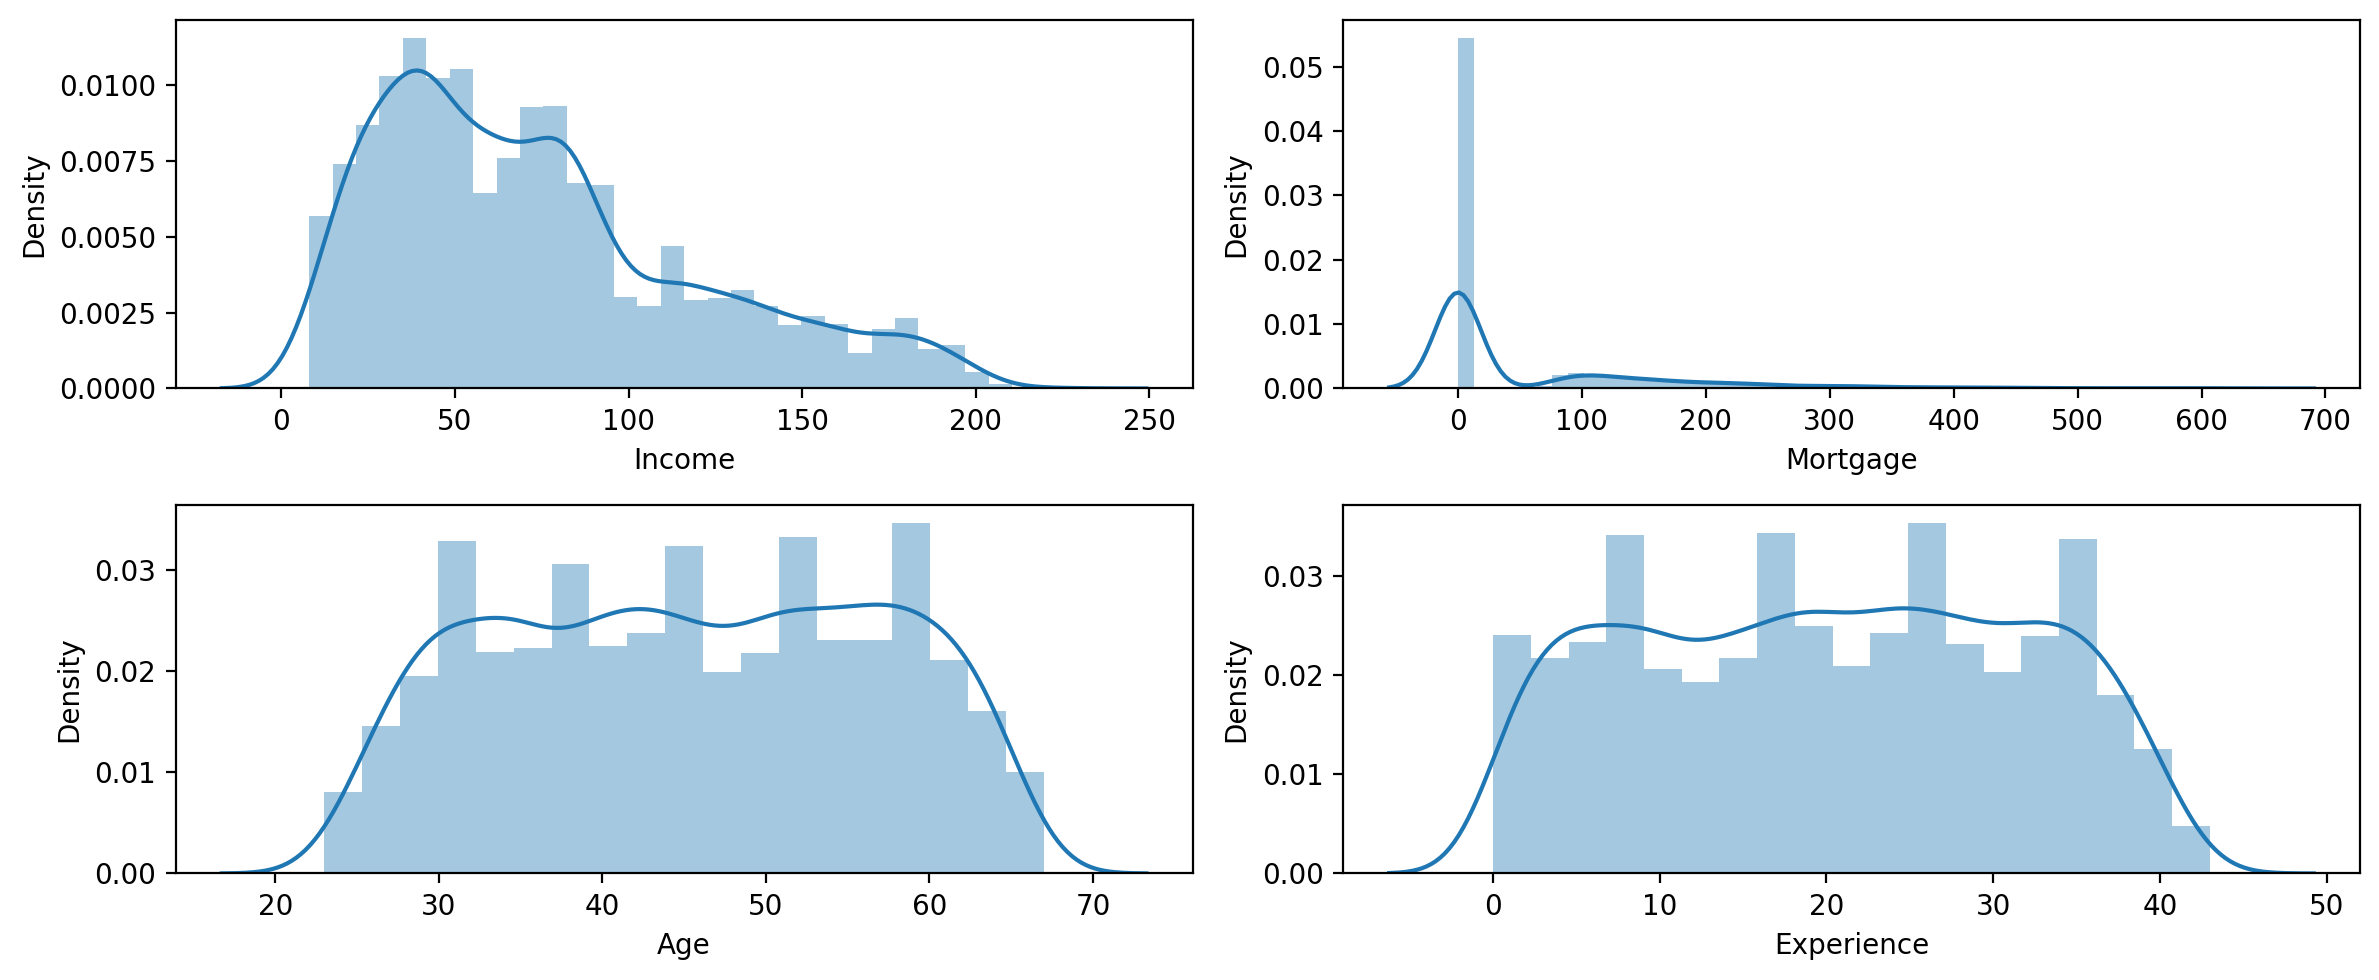

In [31]:
fig, axes = plt.subplots(2,2, figsize=(12,5),dpi=200)
sns.distplot(df['Income'], ax=axes[0,0])
sns.distplot(df['Mortgage'], ax=axes[0,1])
sns.distplot(df['Age'], ax=axes[1,0])
sns.distplot(df['Experience'], ax=axes[1,1])
fig.tight_layout()

### Train, Test and Split

In [112]:
# Separate the features from the labels into 2 objects, X and y
X = df.drop(['Personal Loan'], axis=1)
y = df['Personal Loan']

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

### Scaling

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Logistic Regression Model

In [115]:
from sklearn.linear_model import LogisticRegressionCV
log_model = LogisticRegressionCV()
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

### Coeffecients

In [66]:
log_model.C_

array([2.7825594])

In [65]:
log_model.coef_

array([[-0.22374364,  0.35703246,  2.41189339,  0.79015834,  0.22492839,
         1.41824223,  0.08460632, -0.31871946,  0.98379848, -0.36538692,
        -0.5162104 ]])

<AxesSubplot:>

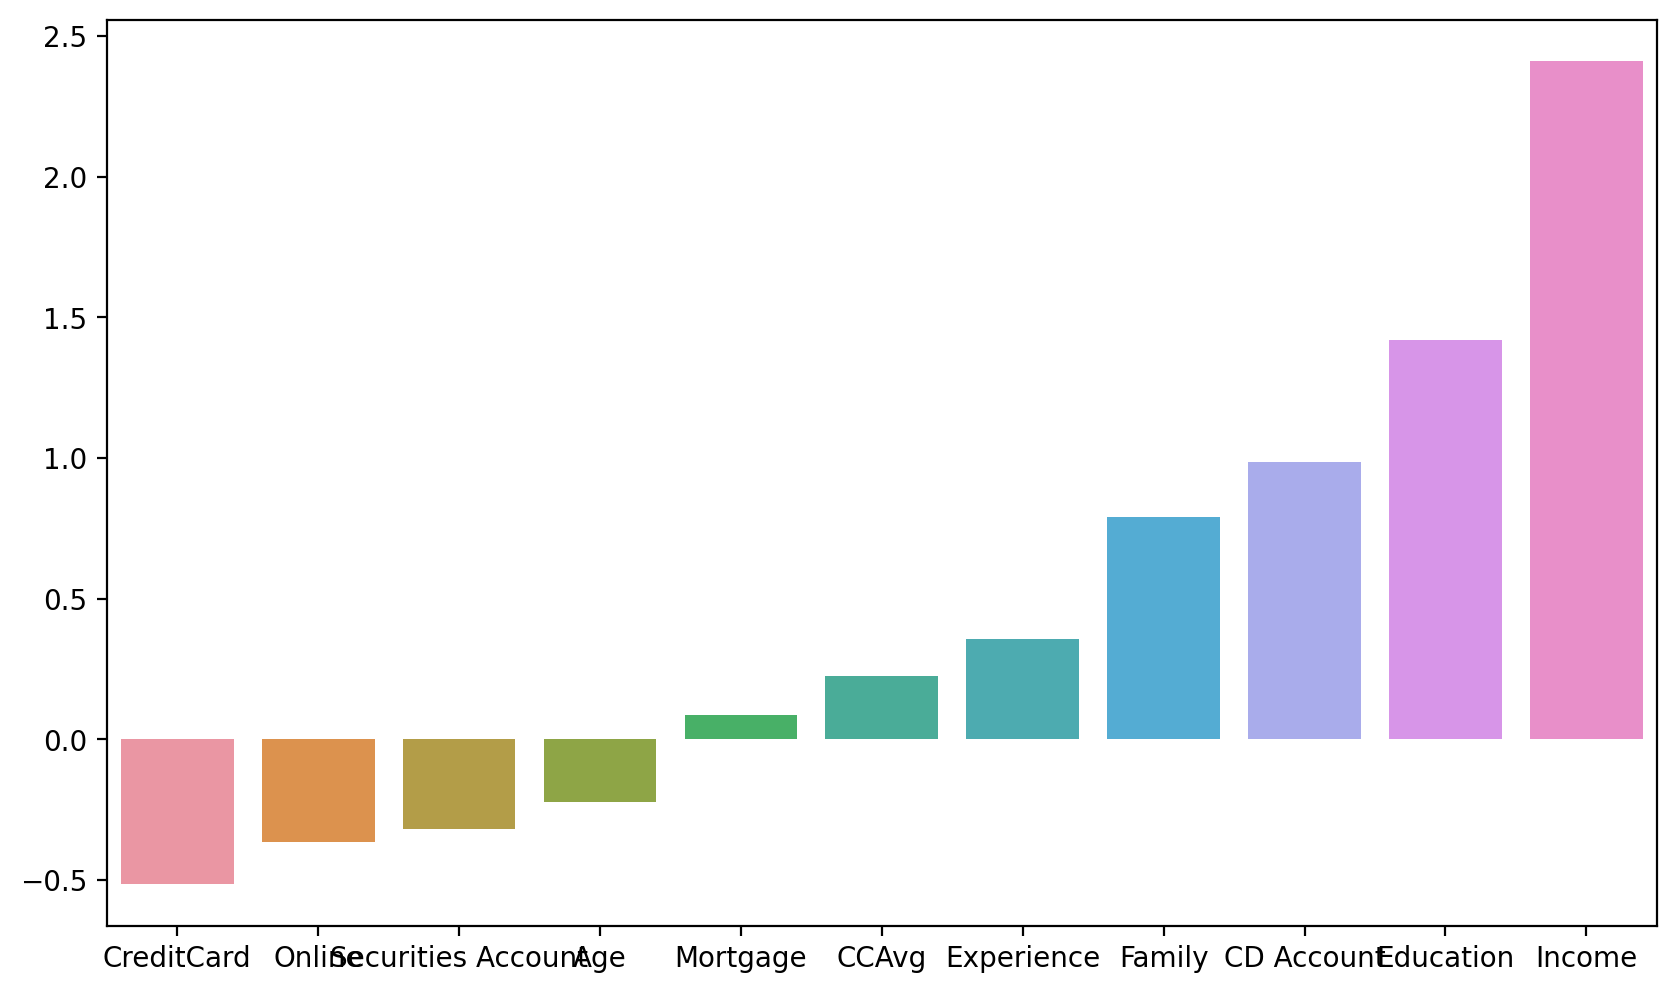

In [70]:
coefs=pd.Series(index=X.columns,data=log_model.coef_[0])
coefs=coefs.sort_values()
plt.figure(figsize=(10,6),dpi=200)
sns.barplot(x=coefs.index,y=coefs.values)

### Model Performance Evaluation

In [116]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
y_pred = log_model.predict(scaled_X_test)
confusion_matrix(y_test,y_pred)

array([[1341,   13],
       [  62,   84]], dtype=int64)

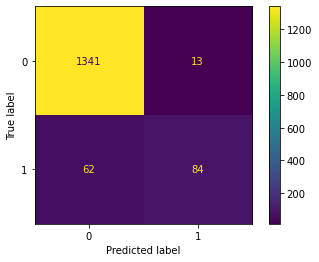

In [74]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [117]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1354
           1       0.87      0.58      0.69       146

    accuracy                           0.95      1500
   macro avg       0.91      0.78      0.83      1500
weighted avg       0.95      0.95      0.95      1500



In [76]:
log_model.score(scaled_X_train,y_train)

0.9548571428571428

In [77]:
log_model.score(scaled_X_test,y_test)

0.95

### Performance Curves

In [78]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

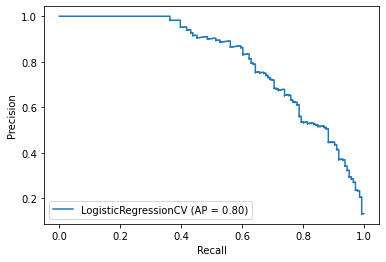

In [79]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

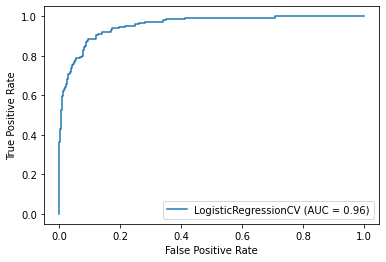

In [80]:
plot_roc_curve(log_model,scaled_X_test,y_test)

In [118]:
X_test.iloc[15]

Age                    36.0
Experience             12.0
Income                150.0
Family                  4.0
CCAvg                   5.4
Education               1.0
Mortgage                0.0
Securities Account      1.0
CD Account              1.0
Online                  1.0
CreditCard              0.0
Name: 834, dtype: float64

In [119]:
y_test.iloc[15]

1

In [120]:
predict_existing = [[ 36.,12.,150.,4.,5.4,1.,0.,1.,1.,1.,0.]]
predict_existing

[[36.0, 12.0, 150.0, 4.0, 5.4, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0]]

In [121]:
log_model.predict(predict_existing)

array([1], dtype=int64)

In [122]:
log_model.predict_proba(predict_existing)

array([[0., 1.]])

In [124]:
predict_new = [[ 60.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]]

In [125]:
log_model.predict(predict_new)

array([0], dtype=int64)

In [126]:
log_model.predict_proba(predict_new)

array([[9.99999986e-01, 1.36752607e-08]])